In [62]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline

In [43]:
data = pd.read_csv("C:\\Users\\GOPIKA\\Documents\\Crop_recommendation (1).csv");

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [45]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [46]:
data.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [47]:
data.dropna()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [48]:
data.sum()

N                                                         111214
P                                                         117398
K                                                         105928
temperature                                         56355.736474
humidity                                           157259.914279
ph                                                  14232.856144
rainfall                                           227620.041915
label          ricericericericericericericericericericericeri...
dtype: object

In [49]:
data.shape

(2200, 8)

array([[<Axes: title={'center': 'N'}>, <Axes: title={'center': 'P'}>,
        <Axes: title={'center': 'K'}>],
       [<Axes: title={'center': 'temperature'}>,
        <Axes: title={'center': 'humidity'}>,
        <Axes: title={'center': 'ph'}>],
       [<Axes: title={'center': 'rainfall'}>, <Axes: >, <Axes: >]],
      dtype=object)

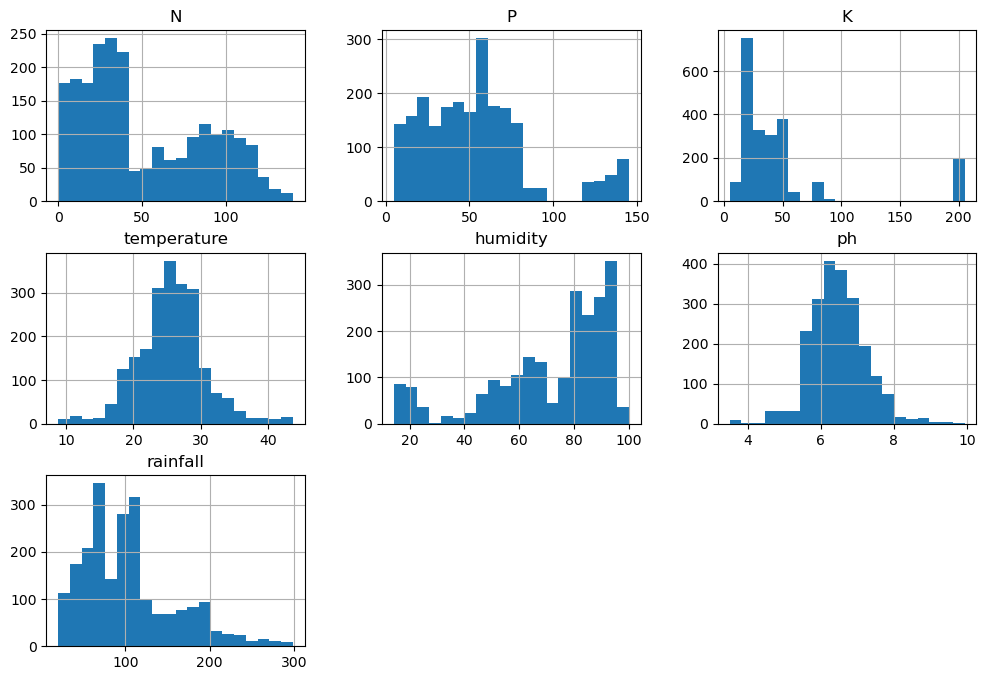

In [50]:
data.hist(bins = 20,figsize=(12, 8))

In [51]:
data.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [52]:
features = data.drop('label', axis=1)
labels = data['label']

In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [54]:
data["label"] = data["label"].astype("category").cat.codes

In [55]:
print(data.dtypes)

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label             int8
dtype: object


In [56]:
data.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20


In [57]:
for i in data.columns:
    if data[i].dtype == 'object':
        data[i] == pd.to_numeric(data[i], errors="coerce")
print(data.isnull().sum)
        

<bound method DataFrame.sum of           N      P      K  temperature  humidity     ph  rainfall  label
0     False  False  False        False     False  False     False  False
1     False  False  False        False     False  False     False  False
2     False  False  False        False     False  False     False  False
3     False  False  False        False     False  False     False  False
4     False  False  False        False     False  False     False  False
...     ...    ...    ...          ...       ...    ...       ...    ...
2195  False  False  False        False     False  False     False  False
2196  False  False  False        False     False  False     False  False
2197  False  False  False        False     False  False     False  False
2198  False  False  False        False     False  False     False  False
2199  False  False  False        False     False  False     False  False

[2200 rows x 8 columns]>


In [58]:
data = data.apply(pd.to_numeric, errors='coerce')

In [59]:
print(data.isnull().sum())

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [60]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, random_state=42)

In [70]:
pipeline = Pipeline(steps=[
    ('scaler', StandardScaler()), 
    ('classifier', RandomForestClassifier(n_estimators = 100))])

In [71]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', RandomForestClassifier())])

In [74]:
accauracy = pipeline.score(X_test, y_test)

In [75]:
print(f"Accuracy : {accauracy:2f}")

Accuracy : 0.995455
